<img src="https://www.kaggle.com/static/images/site-logo.png" width="100px">

**Tutorial for Regression Analysis to Predict the Sales of Big Mart**

<img src="https://cdn.apartmenttherapy.info/image/fetch/f_auto,q_auto:eco/https://storage.googleapis.com/gen-atmedia/3/2017/03/7b8c56018cd32d7f41118dc2a4dfdd0516a3d80f.jpeg" width="1000px">

**Importing Some Libraries**

In [ ]:

# for basic operations
import numpy as np 
import pandas as pd 

# for data visualizations
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use('fivethirtyeight')

# for providing the path
import os
print(os.listdir("../input"))


**Reading the Data**

In [ ]:
# reading the dataset and calculating the computational time

%time train = pd.read_csv("../input/Train.csv")
%time test = pd.read_csv("../input/Test.csv")

print("Train Shape: ", train.shape)
print("Test Shape: ", test.shape)

In [ ]:
# making copies of the datsets 

train_copy = train.copy()
test_copy = test.copy()


In [ ]:
# checking the tail of the dataset

train.head()

In [ ]:
# describing the dataset

train.describe()

In [ ]:
# combining the dataset fordoing some pre-processing

combine = pd.concat([train, test])

# checking the shape of the combine dataset
combine.shape

In [ ]:
# checking if it has aby NULL values

combine.isnull().sum()

In [ ]:
# ploting a dist plot for Item Outlet Sales

plt.rcParams['figure.figsize'] = (15, 7)
sns.distplot(train['Item_Outlet_Sales'], color = 'pink')
plt.title('Target Variable', fontsize = 20)
plt.xlabel('Item Outlet Sales')
plt.ylabel('count')
plt.show()

In [ ]:
# checking different varieties of item fat content
# plotting a histogram for Item Fat Content

train['Item_Fat_Content'].value_counts(normalize = True)
train['Item_Fat_Content'].value_counts().plot.bar()
plt.title('Different varieties of fats in item in the store', fontsize = 20)
plt.xlabel('Fat')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# we will analyze only the training set
# plotting a bar graph for Item Type

sns.countplot(train['Item_Type'], palette = 'spring')
plt.title('Different types of item available in the store', fontsize = 20)
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.xticks(rotation = 90)
plt.show()

In [ ]:
# we will analyze only the training set
# visualizing the outlet identifier

sns.countplot(train['Outlet_Identifier'], palette = 'inferno')
plt.title('Different types of outlet identifier in the store', fontsize = 20)
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# we will analyze only the training set
# visualizing the Outlet size

sns.countplot(train['Outlet_Size'], palette = 'rainbow')
plt.title('Different types of outlet sizes in the store', fontsize = 20)
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# we will analyze only the training set
# visualizing the outlet location type

sns.countplot(train['Outlet_Location_Type'], palette = 'pastel')
plt.title('Different types of outlet location types in the store', fontsize = 20)
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

In [ ]:
# we will analyze only the training set
# visualizing the outlet type

sns.countplot(train['Outlet_Type'], palette = 'summer')
plt.title('Different types of outlet types in the store', fontsize = 20)
plt.xlabel('Item')
plt.ylabel('Number of Items')
plt.show()

**Bi-Variate Analysis**

In [ ]:
# fat content vs outlet identifier

Item_Fat_Content = pd.crosstab(train['Item_Fat_Content'],train['Outlet_Identifier'])
Item_Fat_Content.div(Item_Fat_Content.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(11, 11))
plt.title('Fat content vs Outlet Identifier', fontsize = 20)

In [ ]:
# fat content vs item type

Item_Type = pd.crosstab(train['Item_Type'], train['Item_Fat_Content'])
Item_Type.div(Item_Type.sum(1).astype(float), axis=0).plot(kind="bar", stacked=True, figsize=(15, 11), cmap = 'summer')
plt.title('Fat Content vs Item Type', fontsize = 20)


**Data Pre-processing**

In [ ]:
# DATA PRE-PROCESSING

# checking unique values in the columns of train dataset

combine.apply(lambda x: len(x.unique()))

In [ ]:
# checking if combine has any NULL values

combine.isnull().sum()

In [ ]:
# imputing missing values

combine['Item_Weight'] = combine['Item_Weight'].replace(0, np.NaN)
combine['Item_Weight'].fillna(combine['Item_Weight'].mean(), inplace = True)

combine['Outlet_Size'].fillna(combine['Outlet_Size'].mode()[0], inplace = True)

combine['Item_Outlet_Sales'] = combine['Item_Outlet_Sales'].replace(0, np.NaN)
combine['Item_Outlet_Sales'].fillna(combine['Item_Outlet_Sales'].mode()[0], inplace = True)

# combining reg, Regular and Low Fat, low fat and, LF
combine['Item_Fat_Content'] = combine['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular', 'low fat': 'Low Fat'})
combine['Item_Fat_Content'].value_counts().isnull().sum()

In [ ]:
# combining reg, Regular and Low Fat, low fat and, LF

combine['Item_Fat_Content'] = combine['Item_Fat_Content'].replace({'LF': 'Low Fat', 'reg': 'Regular',
                                                                   'low fat': 'Low Fat'})

# checking the value counts again
combine['Item_Fat_Content'].value_counts()

In [ ]:
# Getting the first two characters of ID to separate them into different categories

combine['Item_Identifier'] = combine['Item_Identifier'].apply(lambda x: x[0:2])
combine['Item_Identifier'] = combine['Item_Identifier'].map({'FD':'Food', 'NC':'Non_Consumable', 'DR':'Drinks'})

# checking the value counts again
combine['Item_Identifier'].value_counts()

In [ ]:
# determining the operation peroid of a time

combine['Outlet_Years'] = 2013 - combine['Outlet_Establishment_Year']

# checking the value counts again for outlet years
combine['Outlet_Years'].value_counts()

In [ ]:
# removing unnecassary columns from the dataset

combine = combine.drop('Item_Identifier', axis = 1)

# getting the new shape of the dataset
print(combine.shape)

In [ ]:
# label encoding

from sklearn.preprocessing import LabelEncoder

# directly applying the label encoder to the whole dataset
combine.apply(LabelEncoder().fit_transform)

In [ ]:
# one hot encoding
# to avoid overfitting and increase variance we must one hot encode the variables

combine = pd.get_dummies(combine)

# checking the new shape of the dataset
print(combine.shape)

**Data Preparation**

In [ ]:
# splitting the data into dependent and independent variables

x = combine.drop('Item_Outlet_Sales', axis = 1)
y = combine.Item_Outlet_Sales

print(x.shape)
print(y.shape)

In [ ]:
# splitting the dataset into train and test

train = combine.iloc[:8523,:]
test = combine.iloc[8523:,:]

# checking the updated shapes
print(train.shape)
print(test.shape)

In [ ]:
# making x_train, x_test, y_train, y_test

from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

print(x_train.shape)
print(y_train.shape)
print(x_test.shape)
print(y_test.shape)

**Linear Regression**

In [ ]:
# MODELLING
# REGRESSION ANALYSIS

# LINEAR REGRESSION

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

model = LinearRegression()
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print('RMSE :', np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))


**Ada Boost Regressor**

In [ ]:
# ADABOOST REGRESSOR

from sklearn.ensemble import AdaBoostRegressor

model= AdaBoostRegressor(n_estimators = 100)
model.fit(x_train, y_train)

# predicting the test set results
y_pred = model.predict(x_test)

# RMSE
mse = mean_squared_error(y_test, y_pred)
print("RMSE :", np.sqrt(mse))


In [ ]:
feature = test.columns
importance = model.feature_importances_
indices = np.argsort(importance)

plt.rcParams['figure.figsize'] = (18, 20)
plt.title('Feature Importances for AdaBoost', fontsize = 30)
plt.barh(range(len(indices)), importance[indices], color = 'red')
plt.yticks(range(len(indices)), feature[indices])
plt.xlabel('Relative Importance')
plt.show()

**Random Forest Regressor**

In [55]:
# RANDOM FOREST REGRESSOR

from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor(n_estimators = 100 , n_jobs = -1)
model.fit(x_train, y_train)

# predicting the  test set results
y_pred = model.predict(x_test)
print(y_pred)

# finding the mean squared error and variance
mse = mean_squared_error(y_test, y_pred)
print("RMSE :",np.sqrt(mse))
print('Variance score: %.2f' % r2_score(y_test, y_pred))

print("Result :",model.score(x_train, y_train))


[1828.226878 2384.642596 1578.052528 ... 1987.685978 1201.322914
  387.016224]
RMSE : 1317.4818452749907
Variance score: 0.17
Result : 0.8917758437818559


**Feature Importance Plot**

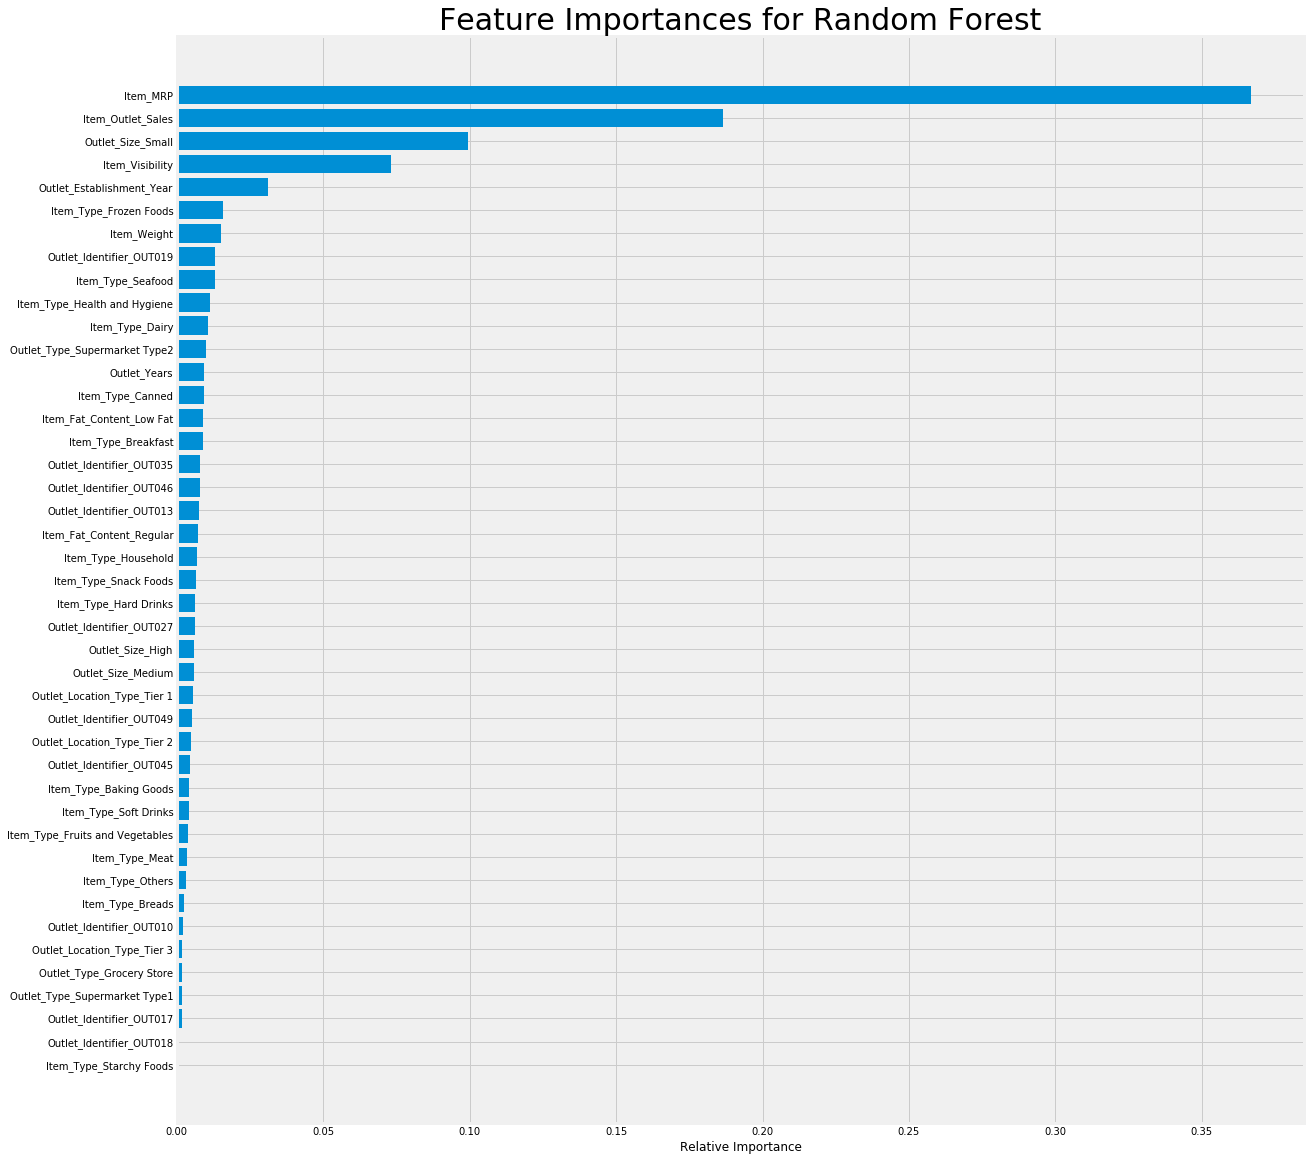

In [56]:
feature = test.columns
importance = model.feature_importances_
indices = np.argsort(importance)

plt.rcParams['figure.figsize'] = (18, 20)
plt.title('Feature Importances for Random Forest', fontsize = 30)
plt.barh(range(len(indices)), importance[indices])
plt.yticks(range(len(indices)), feature[indices])
plt.xlabel('Relative Importance')
plt.show()

**Thanks for Reading the Kernel, Please upvote the Kernel if you like it.**